In [106]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear, TestNonLinear
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

Using random seed: 647


/Users/hanna/Documents/GitHub/optimization_project/svm.py:321: RuntimeWarning: divide by zero encountered in scalar divide
  s = 1 - r_min / r_max


f_before_step=0.0 f_after_step=1513403.3674449874 f_ref=inf
Line search triggered
Iteration 1: τ = 1.3180e-03, Δα = 8.3360e-02
f_before_step=-2.6360821952930404 f_after_step=-3.139479569789344 f_ref=inf
Iteration 2: τ = 1.0000e-05, Δα = 2.6744e-02
f_before_step=-3.139479569789344 f_after_step=-3.14291957953995 f_ref=inf
Iteration 3: τ = 1.3885e-05, Δα = 1.8549e-04
f_before_step=-3.14291957953995 f_after_step=-3.1476929962023847 f_ref=inf
Iteration 4: τ = 1.3435e-03, Δα = 2.5747e-04
f_before_step=-3.1476929962023847 f_after_step=-3.600612068446457 f_ref=inf
Iteration 5: τ = 3.5399e-02, Δα = 2.4903e-02
f_before_step=-3.600612068446457 f_after_step=6.017545721682787 f_ref=inf
Iteration 6: τ = 8.2172e-03, Δα = 5.6359e-01
f_before_step=6.017545721682787 f_after_step=-6.1337219475614795 f_ref=inf
Iteration 7: τ = 1.9100e-05, Δα = 4.3171e-01
f_before_step=-6.1337219475614795 f_after_step=-6.1435514383572665 f_ref=inf
Iteration 8: τ = 1.0000e-05, Δα = 4.3433e-04
f_before_step=-6.14355143835726

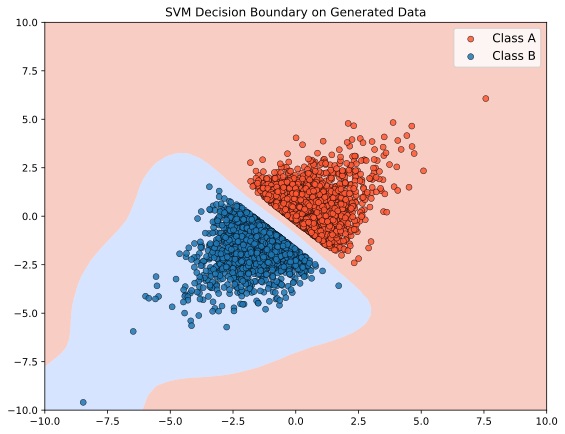

In [108]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 2000
n_B = 2000
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")
#random_seed = 146

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="gaussian", lr=0.01, mode="dual", sigma=1.5, s=1.5, max_iter=5000, tol=1e-4)
%time svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)
decision_values = svm._decision_function(Z).reshape(xx.shape)

print(pd.Series(decision_values.flatten()).describe())

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, decision_values, alpha=0.5, levels=[-100, 0, 100], colors=["#AFCBFF", "#F19C8A"]) # , colors=["#AFCBFF", "#F19C8A"])
# plt.contour(xx, yy, decision_values, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.title("SVM Decision Boundary on Generated Data")
plt.show()

Using random seed: 577
f_before_step=0.0 f_after_step=48102.41274410703 f_ref=inf
Line search triggered
Iteration 1: τ = 1.0183e-02, Δα = 3.2201e-01
f_before_step=-5.091399506229192 f_after_step=-5.766055755063441 f_ref=inf
Iteration 2: τ = 1.0367e-04, Δα = 8.7286e-02
f_before_step=-5.766055755063441 f_after_step=-5.7722485924611 f_ref=inf
Iteration 3: τ = 5.0278e-04, Δα = 8.0132e-04
f_before_step=-5.7722485924611 f_after_step=-5.802253323041949 f_ref=inf
Iteration 4: τ = 1.9096e-01, Δα = 3.8852e-03
f_before_step=-5.802253323041949 f_after_step=-11.350727906615923 f_ref=inf
Iteration 5: τ = 1.9507e-01, Δα = 1.4123e+00
f_before_step=-11.350727906615923 f_after_step=-14.756364517550427 f_ref=inf
Iteration 6: τ = 4.7531e-03, Δα = 1.3689e+00
f_before_step=-14.756364517550427 f_after_step=-16.97138496130126 f_ref=inf
Iteration 7: τ = 7.2638e-04, Δα = 1.1701e-01
f_before_step=-16.97138496130126 f_after_step=-17.104513320526795 f_ref=inf
Iteration 8: τ = 9.6870e-05, Δα = 9.9725e-03
f_before_s

/Users/hanna/Documents/GitHub/optimization_project/svm.py:321: RuntimeWarning: divide by zero encountered in scalar divide
  s = 1 - r_min / r_max


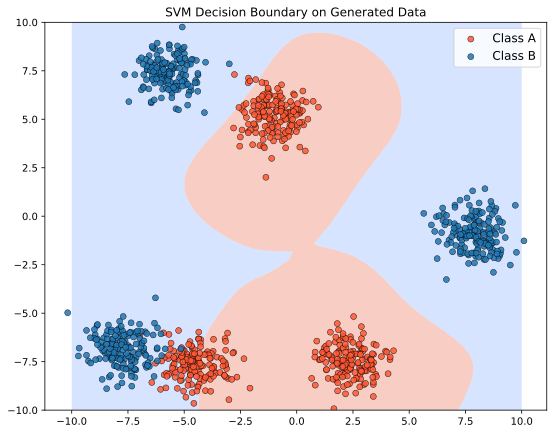

In [111]:
n_A = 500
n_B = 500
random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")
listA, listB = TestNonLinear(n_A, n_B, r_A=3.0, r_B=6.0, noise=0.6, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="gaussian", lr=0.01, mode="dual", sigma=1.5, s=1.5, max_iter=5000, tol=1e-4)
%time svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)
decision_values = svm._decision_function(Z).reshape(xx.shape)

print(pd.Series(decision_values.flatten()).describe())

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, decision_values, alpha=0.5, levels=[-100, 0, 100], colors=["#AFCBFF", "#F19C8A"]) # , colors=["#AFCBFF", "#F19C8A"])
# plt.contour(xx, yy, decision_values, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.title("SVM Decision Boundary on Generated Data")
plt.show()